<a href="https://colab.research.google.com/github/JLuceroVasquez/estadistica-con-python-probabilidad-y-muestreo/blob/main/notebook-del-curso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTADÍSTICA - PARTE 2</font>
***

# <font color=green>1 CONOCIENDO LOS DATOS</font>
***

## <font color=green>1.1 Dataset del proyecto</font>
***

### Encuesta Nacional por Muestreo de Hogares - 2015

La **Encuesta Nacional por Muestreo de Hogares - ENMH** en Brasil anualmente investiga, de manera permanente, características generales de la población, educación, trabajo, ingresos, vivienda y otras, con frecuencia variables, de acuerdo a las necesidades de información del país, tales como las características de migración, fecundidad, nupcialidad, salud, seguridad alimentaria, entre otros temas. La recopilación de estas estadísticas constituye, durante los 49 años de realización de la investigación, un importante instrumento para la formulación, validación y evaluación de políticas orientadas al desarrollo socioeconómico y la mejora de las condiciones de vida en Brasil.

### Fuente de los Datos

Instituto Brasileño de Geografía y Estadística (IBGE) Encuesta Nacional por Muestreo de Hogares(PNAD) en el 2015

### Variables utilizadas

> ### Ingresos
> ***

Ingresos mensuales del trabajo principal para personas de 10 años o más.

> ### Edad
> ***

Edad del residente en años en la fecha de referencia .

> ### Altura (elaboración propia)
> ***

Altura del habitante en metros.

> ### UF
> ***

Unidad Federal

|Código|Descripción|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descripción|
|---|---|
|0|Masculino|
|1|Femenino|

> ### Años de Estudio
> ***

|Código|Descripción|
|---|---|
|1|Sin educación o menos de 1 año|
|2|1 año|
|3|2 años|
|4|3 años|
|5|4 años|
|6|5 años|
|7|6 años|
|8|7 años|
|9|8 años|
|10|9 años|
|11|10 años|
|12|11 años|
|13|12 años|
|14|13 años|
|15|14 años|
|16|15 años o más|
|17|No determinado|
||No aplica|

> ### Color
> ***

|Código|Descripción|
|---|---|
|0|Indígena|
|2|Blanco|
|4|Negro|
|6|Amarillo|
|8|Pardo|
|9|Sin declarar|

#### <font color='red'>Nota</font>
***
> Se realizaron los siguientes tratamientos sobre los datos originales:
> 1. Se eliminaron los registros en los que **Ingreso** no era válido. (999 999 999 999);
> 2. Se eliminaron los registros en los que **Ingreso** eran missing;
> 3. Solo se consideraron los registros de **Personas de Referencia** de cada hogar (responsable del hogar).

### Importando pandas y leyendo el dataset del proyecto

https://pandas.pydata.org/

In [ ]:
#Se verifica la codificación del archivo.

#Importamos la librería que determina la codificación de un archivo binario.
import chardet

#Subimos el archivo al directorio de archivos de GColab.
#Leemos el archivo como binario y detectamos su codificación, almacenando el resultado en un diccionario llamado "result".
with open("/content/datos_sus.csv",'rb') as f:
  diccionario = chardet.detect(f.read())
  encoding = diccionario['encoding'] #La codificación del archivo es el valor de la clave "encoding"

#Imprimimos .
print(f"La codificación del archivo es {encoding}")

La codificación del archivo es ISO-8859-1


In [73]:
#Se importan las librerías.
import pandas as pd
import numpy as np
from scipy.special import comb
from scipy.special import factorial
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

In [2]:
#Se importa el archivo csv desde Github.

url = "https://github.com/JLuceroVasquez/estadistica-con-python-probabilidad-y-muestreo/raw/refs/heads/main/datos.csv"

datos = pd.read_csv(url, encoding="ISO-8859-1")
datos.head()

,Ciudad,Sexo,Edad,Color,Años de Estudio,Ingreso,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


---
---

# <font color=green>2 DISTRIBUCIONES DE PROBABILIDAD</font>
***

## <font color=red>Problema</font>
***

En una competencia para ocupar un puesto de científico de datos, tenemos un total de **10 preguntas** de opción múltiple con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Suponga que un candidato decide aventurarse sin haber estudiado nada. Decide hacer la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y la puntuación de corte es 5**, obtenga la probabilidad de que este candidato **acierte 5 preguntas** y también la probabilidad de que el candidato **pase a la siguiente etapa del proceso de selección**.

## <font color=green>2.1 Distribución Binomial</font>
***

Un evento **binomial** se caracteriza por la posibilidad de que solo ocurran dos categorías. Estas categorías juntas representan todo el espacio muestral, siendo también mutuamente excluyentes, es decir, la ocurrencia de una implica la no ocurrencia de la otra.

En el análisis estadístico, el uso más común de la distribución binomial es para resolver problemas que involucran situaciones de **éxito** y **fracaso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Donde:

$p$ = probabilidad de éxito

$q = (1 - p)$ = probabilidad de fracaso

$n$ = número de eventos estudiados

$k$ = número de eventos deseados que tienen éxito

### Experimento Binomial

1. Realización de $n$ pruebas idénticas.

2. Las pruebas son independientes.

3. Solo son posibles dos resultados, por ejemplo: Verdadero o falso; Cara o cruz; Éxito o fracaso.

4. La probabilidad de éxito está representada por $p$ y la probabilidad de fracaso por $1-p = q$. Estas probabilidades no cambian de una prueba para otra.

### Media de la distribución binomial

El valor esperado o la media de la distribución binomial es igual al número de experimentos realizados multiplicado por la probabilidad de que ocurra el evento.

# $$\mu = n \times p$$

### Desviación estándar de la distribución binomial

La desviación estándar es la raíz quadrada del producto entre el número de experimentos, la probabilidad de éxito y la probabilidad de fracaso.

# $$\sigma = \sqrt{n \times p \times q}$$

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

### Combinaciones

El número de combinaciones de $n$ objetos, tomando $k$ cada vez, es:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Donde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definición

## $$0! = 1$$

## <font color='blue'>Ejemplo: Mega Sena</font>

En una rueda de lotería Mega Sena tenemos un total de **60 números** para elegir, donde la apuesta mínima es de **seis números**. Usted que es curioso(a) decide calcular la probabilidad de ganar la Mega Sena con solo **un juego**. Para eso necesitamos saber cuántas **combinaciones de seis números se pueden formar con los 60 números disponibles**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [3]:
total_numeros = comb(60,6)
total_numeros

np.float64(50063860.0)

In [4]:
probabilidad = 1/total_numeros
print(f'La probabilidad de ganar el juego es de {probabilidad:.11f}')

La probabilidad de ganar el juego es de 0.00000001997


## <font color='blue'>Ejemplo: Concurso para científico de datos</font>

En una competencia para ocupar un puesto de científico de datos, tenemos un total de **10 preguntas** de opción múltiple con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Suponga que un candidato decide aventurarse sin haber estudiado nada. Decide tomar la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y la puntuación de corte es 5**, obtenga la probabilidad de que este candidato **acierte 5 preguntas** y también la probabilidad de que el candidato **pase a la siguiente etapa del proceso de selección**.

### ¿Cuál es la cantidad de pruebas ($n$)?

In [5]:
n = 10
n

10

### ¿Las pruebas son independientes?

Sí. La opción elegida en una pregunta no influye en la opción elegida en otra pregunta.

### ¿Sólo dos resultados son posibles en cada prueba?

Sí. El candidato tiene dos posibilidades, ACERTAR o FALLAR una pregunta.

### ¿Cuál es la probabilidad de éxito ($p$)?

In [6]:
cantidad_alternativas_por_pregunta = 3
p = 1/ cantidad_alternativas_por_pregunta
p

0.3333333333333333

### ¿Cuál es la probabilidad de fracaso ($q$)?

In [7]:
q = 1 - p
q

0.6666666666666667

### ¿Cuál es el número total de eventos para tener éxito ($k$)?

In [8]:
k = 5
k

5

### Solución 1

In [9]:
prob_binom_5 = ((comb(n,k))*(p ** k)*(q ** (n-k)))
prob_binom_5

np.float64(0.13656454808718185)

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

🧮 **binom.pmf**

```python
binom.pmf(k, n, p, loc=0)
k: valor(es) donde evaluamos la probabilidad.

n: número de ensayos.

p: probabilidad de éxito.

loc: parámetro de desplazamiento (shift).
```
¿Qué es loc en binom.pmf?

Por defecto (loc = 0), la variable aleatoria 𝑋 representará el número de éxitos en 𝑛 ensayos (0,1,…,n).

Pero si pones, por ejemplo, `loc = 2`, entonces estás redefiniendo el “0” para tu variable aleatoria, el cual ahora será en realidad 2. Entonces si preguntas por k = 5, internamente SciPy calculará la probabilidad de 3 éxitos estándar (porque 5 - 2 = 3).

```python
# Con loc = 0
print(binom.pmf(3, n=5, p=0.4, loc=0))
# Resultado: probabilidad de exactamente 3 éxitos en 5 ensayos

# Con loc = 2
print(binom.pmf(5, n=5, p=0.4, loc=2))
# Equivale a binom.pmf(5 - 2, n=5, p=0.4) → pmf(3, ...)
# Resultado: probabilidad de 3 éxitos en vez de 5, porque desplazamos la base con loc=2.
```



### Solución 2

In [10]:
prob_binom_5_sol2 = binom.pmf(k,n,p)
prob_binom_5_sol2

np.float64(0.13656454808718146)

### Obtenga la probabilidad de que el candidato apruebe

### $$P(acertar \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P(10)$$

In [11]:
#Método 1 con binom.pmf
resultados_aprobatorios = list(range(5,11,1))
array_prob_binom_aprobatorios = binom.pmf(k=resultados_aprobatorios, n=n, p=p)
prob_binom_aprobatorios = array_prob_binom_aprobatorios.sum()
print(f' Se calculó un {type(prob_binom_aprobatorios)} con las probabilidades\n',
      'individuales de los escenarios deseados. Siendo la probabilidad de que\n',
      f'el candidato apruebe: {prob_binom_aprobatorios:.15f}')

 Se calculó un <class 'numpy.float64'> con las probabilidades
 individuales de los escenarios deseados. Siendo la probabilidad de que
 el candidato apruebe: 0.213128080069095


In [12]:
#Método 2 con binom.cdf
prob_binom_aprobatorios_metodo2 = 1- binom.cdf(k=4,n=n,p=p) #1 - Prob. acumulada de obtener 0 a 4 preguntas correctas.
prob_binom_aprobatorios_metodo2

np.float64(0.21312808006909523)

In [13]:
#Método 3 con binom.sf -> 1 - binom.cdf
prob_binom_aprobatorios_metodo3 = binom.sf(k=4,n=n,p=p) #Prob. acumulada inversa de obtener 0 a 4 preguntas correctas -> 5 a 10 preguntas correctas.
prob_binom_aprobatorios_metodo3

np.float64(0.21312808006909525)

In [14]:
'''
Un dado perfectamente equilibrado se lanza hacia arriba diez veces.
Usando la distribución binomial, obtenga la probabilidad de que los dados
caigan con el número cinco hacia arriba al menos tres veces.
'''
p1 = 1/6
binom.sf(k=2,n=10,p=p1)

np.float64(0.22477320212874055)

## <font color='blue'>Ejemplo: Yincana</font>

Una ciudad del interior realiza una yincana cada año para recaudar fondos para el hospital de la ciudad. En la última competencia se sabe que la **proporción de mujeres participantes fue del 60%**. **El número total de equipos, con 12 miembros, inscritos en la yincana de este año es 30**. Con la información anterior, responda: ¿Cuántos equipos deberían estar formados por **8 mujeres**?

### Solución

In [15]:
#Se divide el problema en dos partes.
'''
1era parte: Cálculo de la p
p = binom.pmf(k=8, n=12, p=0.6)

2da parte: Cálculo de u
u = p x 30
'''

'\n1era parte: Cálculo de la p\np = binom.pmf(k=8, n=12, p=0.6)\n\n2da parte: Cálculo de u\nu = p x 30\n'

In [16]:
#En la primera parte, tenemos como n a 12 y como p a 0.6.
'''
A continuación, calculamos la probabilidad de obtener 8 resultados de éxito en
un total de 12 ensayos.
- 1 resultado de éxito = Seleccionar 1 mujer.
- 1 ensayo = Seleecionar 1 persona (hombre o mujer).
Entonces, calculamos la probabilidad de seleccionar 8 mujeres en un total de 12
personas donde la probabilidad de seleccionar una mujer es de 0.6.
'''
p_gincana = binom.pmf(k=8, n=12, p=0.6)
p_gincana

np.float64(0.21284093952)

In [17]:
#En la segunda parte, tenemos como n a 30 y como p a 0.21.
'''
A continuación, caculamos el valor esperado de resultados exitosos en un total
de 30 ensayos.
- 1 resultado de éxito = Conformar un equipo de 12 personas con 8 mujeres.
- 1 ensayo = Conformar un equipo.
Entonces, caculamos la cantidad de equipos con 8 mujeres en un total de 30
equipos donde la probabilidad de formar el equipo deseado es de 0.21.
'''
u_gincana = p_gincana*30
u_gincana

np.float64(6.3852281856)

## <font color='blue'>Ejercicio: Ojos azules</font>
Suponga que la probabilidad de que una pareja tenga hijos con ojos azules es
del 22%. En 50 familias, con 3 hijos cada una, ¿cuántas podemos esperar que
tengan dos hijos con ojos azules?

In [18]:
#Parte 1, n es 3 y p es 22%.
'''
Calcular la probabilidad de tener 3 resultados exitosos en 3 ensayos.
- 1 resultado de éxito = Tener un hijo con ojos azules.
- 1 ensayo = Tener 1 hijo.
'''
p_ojosazules = binom.pmf(k=2,n=3,p=0.22)
p_ojosazules

np.float64(0.11325599999999993)

In [19]:
#Parte 2, n es 50 y p es 11.32%.
'''
Calcular el valor esperado de resultados exitosos en 50 ensayos.
- 1 resultado de éxito = Seleccionar una pareja con 2 hijos que tengan ojos azules.
- 1 ensayo = Seleccionar una pareja con 3 hijos.
'''
u_ojosazules = p_ojosazules*50
u_ojosazules

np.float64(5.662799999999996)

---
---

## <font color=red>Problema</font>
***

Un restaurante recibe un promedio de **20 pedidos por hora**. ¿Cuál es la probabilidad de que, en un momento determinado al azar, el restaurante reciba **15 pedidos**?

## <font color=green>2.2 Distribución Poisson</font>
***

Se utiliza para describir el número de ocurrencias en un tiempo o espacio específico. Los eventos se caracterizan por la posibilidad de contar los éxitos, pero no poder contar los fracasos.

Como ejemplos de procesos donde podemos aplicar la distribución de Poisson tenemos la determinación del número de clientes que ingresan a una tienda en un momento determinado, el número de autos que llegan a un Auto-servicio de una cafetería a la hora del almuerzo, la determinación del número de accidentes registrados en un tramo de carretera, etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Donde:

$e$ = constante cuyo valor aproximado es 2.718281828459045

$\mu$ = representa el número promedio de ocurrencias en un intervalo de tiempo o espacio dado

$k$ = número de éxitos en el intervalo deseado

### Experimento Poisson

1. La probabilidad de que ocurra es la misma en todo el intervalo observado.

2. El número de ocurrencias en un intervalo dado es independiente del número de ocurrencias en otros intervalos.

3. La probabilidad de que ocurra es la misma en intervalos de igual longitud.

### Media de la distribución Poisson

# $$\mu$$

### Desviación estándar de la distribución Poisson

# $$\sigma = \sqrt{\mu}$$

### Importando bibliotecas

https://numpy.org/doc/stable/reference/generated/numpy.exp.html

https://docs.scipy.org/doc/scipy-1.16.0/reference/generated/scipy.special.factorial.html

In [20]:
#Se accede a la constante de euler con Numpy.
euler = np.e
#Se puede hacer cálculos de factorial con SciPy.
factorial_3 = factorial(3)

print(f'La constante de euler es {euler:4f}; y el factorial de 3 es {factorial_3}.')

La constante de euler es 2.718282; y el factorial de 3 es 6.0.


## <font color='blue'>Ejemplo: Delivery</font>

Un restaurante recibe un promedio de **20 pedidos por hora**. ¿Cuál es la probabilidad de que, en un momento determinado al azar, el restaurante reciba **15 pedidos**?

### ¿Cuál es el número promedio de ocurrencias por hora ($\mu$)?

In [21]:
media_delivery = 20
media_delivery

20

### ¿Qué número de ocurrencias queremos obtener en el período ($k$)?

In [22]:
eventos_delivery = 15
eventos_delivery

15

### Solución 1: Cálculo manual

In [23]:
probabilidad_delivery = ((np.e**(-media_delivery))*(media_delivery**eventos_delivery))/(factorial(eventos_delivery))
probabilidad_delivery

np.float64(0.0516488535317584)

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

🧮 **poisson.pmf**
```python
scipy.stats.poisson.pmf(k, mu, loc=0)
ddd
```
| Parámetro | Descripción                                                                                                                     |
| --------- | ------------------------------------------------------------------------------------------------------------------------------- |
| `k`       | Valor(es) discretos donde se evalúa la función de probabilidad. Debe cumplir: `k ≥ 0`.                                          |
| `mu`      | Media de la distribución (también se llama **lambda**, $\lambda$). Representa el número esperado de eventos. Debe ser `mu ≥ 0`. |
| `loc`     | Valor de desplazamiento de la distribución. Por defecto es `0`. Sirve para evaluar la probabilidad en un punto **desplazado**:  |


### Solución 2: Cálculo directo

In [24]:
probabilidad_delivery_sol2 = poisson.pmf(k=eventos_delivery, mu=media_delivery)
probabilidad_delivery_sol2

np.float64(0.05164885353175814)

## <font color='blue'>Ejercicio: Panaderia</font>
El número media de clientes que ingresan a una panadería por hora es 20. Obtenga la probabilidad de que, en la próxima hora, ingresen exactamente 25 clientes.

In [25]:
probabilidad_panaderia = poisson.pmf(k=25, mu=20)
print(f'{probabilidad_panaderia:.8f}')

0.04458765


---
---

## <font color=red>Problema</font>
***

En un estudio sobre la altura de los residentes de una ciudad, se encontró que el conjunto de datos sigue una **distribución aproximadamente normal**, con **media 1.70** y **desviación estándar de 0.1**. Con esta información, obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona, seleccionada al azar, sea menor de 1.80 metros.

> **B.** probabilidad de que una persona, seleccionada al azar, tenga entre 1.60 metros y 1.80 metros.

> **C.** probabilidad de que una persona, seleccionada al azar, tenga más de 1.90 metros.


## <font color=green>2.3 Distribución Normal</font>
***

La distribución normal es una de las más utilizadas en estadística. Es una distribución continua, donde la distribución de frecuencias de una variable cuantitativa tiene forma de campana y es simétrica en relación con su media.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img001.png' width='500px'>

### Características importantes

1. Es simétrica alrededor de la media;

2. El área bajo la curva corresponde a la proporción 1 o 100%;

3. Las medidas de tendencia central (media, mediana y moda) tienen el mismo valor;

4. Los extremos de la curva tienden al infinito en ambas direcciones y, teóricamente, nunca tocan el eje $x$;

5. La desviación estándar define la planitud y el ancho de la distribución. Las curvas más anchas y planas tienen valores de desviación estándar más altos;

6. La distribución se define por su media y desviación estándar;

7. La probabilidad siempre será igual al área bajo la curva, delimitada por los límites superior e inferior.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media

La probabilidad se obtiene del área bajo la curva, delimitada por los límites superior e inferior especificados. Se puede ver un ejemplo en la figura siguiente.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img002.png' width='500px'>


Para obtener el área anterior, simplemente calcule la integral de la función para los intervalos determinados. Según la siguiente ecuación:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviación estándar

$\mu$ = media

$L_i$ = límite inferior

$L_s$ = límite superior

### Tablas estandarizadas

Se crearon tablas estandarizadas para facilitar la obtención de los valores de las áreas bajo la curva normal y eliminar la necesidad de resolver integrales definidas.

Para ver los valores en una tabla estandarizada, simplemente transforme nuestra variable en una variable estandarizada $Z$.

Esta variable $Z$ representa la desviación en las desviaciones estándar de un valor de la variable original en relación con la media.

# $$Z = \frac{x-\mu}{\sigma}$$

Donde:

$x$ = variable normal con media $\mu$ y desviación estándar $\sigma$

$\sigma$ = desviación estándar

$\mu$ = media

### Construyendo la tabla normal estandarizada
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [26]:
tabla_normal_estandarizada = pd.DataFrame(
    [],
    index=["{:.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{:.2f}".format(i / 100) for i in range(0, 10)])

for index in tabla_normal_estandarizada.index:
    for column in tabla_normal_estandarizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabla_normal_estandarizada.loc[index, column] = "{:.4f}".format(norm.cdf(Z))

tabla_normal_estandarizada.rename_axis('Z', axis = 'columns', inplace = True)

tabla_normal_estandarizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img003.png' width='250px'>

La tabla anterior proporciona el área bajo la curva entre $-\infty$ y $Z$ desviaciones estándar por encima de la media. Recordando que dado que estos son valores estandarizados, tenemos $\mu = 0$.

## <font color='blue'>Ejemplo: ¿Cuánto mides?</font>

En un estudio sobre la altura de los residentes de una ciudad, se encontró que el conjunto de datos sigue una **distribución aproximadamente normal**, con **media 1.70** y **desviación estándar de 0.1**. Con esta información, obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona, seleccionada al azar, mida menos que 1.80 metros.

> **B.** probabilidad de que una persona, seleccionada al azar, mida entre 1.60 metros y 1.80 metros.

> **C.** probabilidad de que una persona, seleccionada al azar, mida más de 1.90 metros.

### Problema A - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img004.png' width='350px'>


### Obtener la variable estandarizada $Z$

In [27]:
#Declaramos las variables.
media = 1.7
desviacion_estandar = 0.1
z = (1.8-media)/desviacion_estandar
z

1.0000000000000009

### Solución 1 - Utilizando la tabla

In [28]:
#La probabilidad acumulada a la izquierda de z= 1 es 84.13%.
probabilidad_altura_problema_a = tabla_normal_estandarizada.loc["1.00", "0.00"]
probabilidad_altura_problema_a

'0.8413'

### Solución 2 - Utilizando Scipy

In [29]:
#Se emplea la función norm.cdf() de Scipy.stats.
probabilidad_altura_problema_a = norm.cdf(z)
probabilidad_altura_problema_a

np.float64(0.8413447460685431)

**Ejercicio del aula**

La aplicación de una prueba Estadística en una competencia presentó un conjunto de notas normalmente distribuidas. Se encontró que el conjunto de notas tenía una media de 70 y una desviación estándar de 5 puntos.

¿Qué probabilidad hay de que un estudiante, seleccionado al azar, obtenga una puntuación inferior a 85 puntos?

In [30]:
norm.cdf(85,70,5)

np.float64(0.9986501019683699)

### Problema B - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img005.png' width='350px'>

### Obtener la variable estandarizada $Z$

In [31]:
z_superior = (1.80-media)/desviacion_estandar
z_superior

1.0000000000000009

In [32]:
z_inferior = (1.60-media)/desviacion_estandar
z_inferior

-0.9999999999999987

### Solución 1 - Utilizando la tabla

In [33]:
#Se calculó el doble del área entre 1.70 y 1.80, considerando z(1.70) = 0.
'''
¿Por qué? Debido a que el área entre la media y 1.80 metros es
igual al área entre 1.60 metros y la media. Toda vez que la distribución
normal es simétrica a los lados de la media.
'''
probabilidad_altura_problema_b = 2*(float(tabla_normal_estandarizada.loc["1.00", "0.00"])-
                                    float(tabla_normal_estandarizada.loc["0.00", "0.00"]))

probabilidad_altura_problema_b

0.6826000000000001

### Solución 2 - Utilizando Scipy

In [34]:
#Se calculó la probabilidad acumulada entre -∞ y 1.80, y restó con su probabilidad complementaria.
'''
¿Por qué?
La probabilidad complementaria es P(1.80, +∞) = 1 - P(-∞, 1.80)
Esta probabilidad es igual a la P(-∞, 1.60). Toda vez que la distribución
normal es simétrica a los lados de la media.

Entonces, la resta:
P(-∞, 1.80) - [1 - P(-∞, 1.80)] = P(-∞, 1.80) - P(-∞, 1.60)
Sirve para el propósito de calcular la probabilidad entre 1.60 y 1.80.
'''
probabilidad_altura_problema_b = norm.cdf(z_superior) - (1-norm.cdf(z_superior))
probabilidad_altura_problema_b

np.float64(0.6826894921370863)

In [35]:
#Se calculó la probabilidad acumulada entre el límite inferior (1.60) y el límite superior (1.80).
probabilidad_altura_problema_b = norm.cdf(z_superior) - norm.cdf(z_inferior)
probabilidad_altura_problema_b

np.float64(0.6826894921370857)

**Ejercicio del aula**

La facturación diaria de un controlador de aplicación sigue una distribución aproximadamente normal, con un media de \$ 300,00 y una desviación estándar igual a \$ 50,00. Obtenga las probabilidades de que, en un día aleatorio, el conductor gane:

1) Entre \$ 250,00 y \$ 350,00

2) Entre \$ 400,00 y \$ 500,00

In [36]:
prob_250_350 = norm.cdf(350,300,50) - (1-norm.cdf(350,300,50)) #Método: P(LimSup) - [1 - P(LimSup)]
prob_400_500 = norm.cdf(500,300,50) - norm.cdf(400,300,50) #Método: P(LimSup) - P(LimSInf)
print(f'Las probabilidades son {prob_250_350:.4f} y {prob_400_500:.4f}')

Las probabilidades son 0.6827 y 0.0227


### Problema C - Identificación del área bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img006.png' width='350px'>

### Obtener la variable estandarizada $Z$

In [37]:
z_altura_problema_c = (1.9-media)/desviacion_estandar
z_altura_problema_c

1.9999999999999996

### Solución 1 - Utilizando la tabla

In [38]:
probabilidad_altura_problema_c = 1 - float(tabla_normal_estandarizada.loc["2.00", "0.00"])
probabilidad_altura_problema_c

0.022800000000000042

### Solución 2 - Utilizando Scipy

In [39]:
#Con norm.cdf.
'''
Aquí hay dos maneras:
 i) Calculamos la prob. complementaria: 1 - P(-∞, 1.90)
ii) Calculamos la prob. del valor negativo de X: P(-1.90)
    Esta probabilidad es igual a la P(1.90, +∞). Toda vez que la distribución
    normal es simétrica a los lados de la media.
'''
probabilidad_altura_problema_c = norm.cdf(- z_altura_problema_c)
probabilidad_altura_problema_c

np.float64(0.022750131948179216)

In [40]:
#Con norm.sf.
probabilidad_altura_problema_c = norm.sf(z_altura_problema_c)
probabilidad_altura_problema_c

np.float64(0.022750131948179216)

**Ejercicio del aula**

Una empresa verificó que las lámparas incandescentes XPTO tienen una vida útil normalmente distribuida, con un media igual a 720 días y una desviación estándar igual a 30 días. Calcula la probabilidad de que una lámpara, elegida al azar, dure:

1) Entre 650 y 750 días

2) Más de 800 días

3) Menos de 700 días

In [41]:
#Parte 1.
resultado1 = norm.cdf(750, 720, 30) - norm.cdf(650, 720, 30)
#Parte 2.
resultado2 = norm.sf(800, 720, 30)
#Parte 3.
resultado3 = norm.cdf(700, 720, 30)

print(f'Las probabilidades son {resultado1:.4f}, {resultado2:.4f} y {resultado3:.4f}')

Las probabilidades son 0.8315, 0.0038 y 0.2525


**Ejercicio del aula**

Usando la tabla estandarizada, o las herramientas proporcionadas por Python, encuentre el área debajo de la curva normal para los valores Z a continuación:

1) Z < 1,96

2) Z > 2,15

3) Z < -0,78

4) Z > 0,59

In [42]:
#Se crea un diccionario "Z" con los tipos de probabilidad que piden.
z = {'z_izquierda':[1.96, -0.78], 'z_derecha':[2.15, 0.59]}

#Con ayuda de la función defaultdict, se crea el diccionario "probabilidades".
'''
Este diccionario está vacío, pero si se asignan valores a claves que aún no
existen en él, entonces se creará la clave con el valor cero por defecto.
'''
from collections import defaultdict
probabilidades = defaultdict(None)

#Se itera sobre las claves del diccionario Z.
for clave in z:
  valor = z[clave] #Se almacenan la lista con los valores de clave en "valor".

  #Si la clave es "z_izquierda", se calcula la probabilidad acumulada a la izquierda.
  if clave == 'z_izquierda':
    #El cálculo se hace para todos los valores de la clave "z_izquierda".
    for i in range(len(valor)):
      prob = norm.cdf(valor[i])
      #La probabilidad calculada se sobreescribe como valor de una clave del diccionario "probabilidades".
      #La clave del diccionario es la variable estandarizada usada en el cáculo de la probabilidad.
      probabilidades[valor[i]] = prob

  #Si la clave es "z_derecha", se calcula la probabilidad acumulada a la derecha.
  elif clave == 'z_derecha':
    #El cálculo se hace para todos los valores de la clave "z_derecha".
    for i in range(len(valor)):
      prob = norm.sf(valor[i])
      #La probabilidad calculada se sobreescribe como valor de una clave del diccionario "probabilidades".
      #La clave del diccionario es la variable estandarizada usada en el cáculo de la probabilidad.
      probabilidades[valor[i]] = prob

probabilidades

defaultdict(None,
            {1.96: np.float64(0.9750021048517795),
             -0.78: np.float64(0.21769543758573312),
             2.15: np.float64(0.0157776073910905),
             0.59: np.float64(0.27759532475346493)})

# <font color=green>3 MUESTREO</font>
***

## <font color=green>3.1 Población y Muestra</font>
***

### Población
Conjunto de todos los elementos de interés de un estudio. Varios elementos pueden componer una población, por ejemplo: personas, edades, alturas, automóviles, etc.

En cuanto al tamaño, las poblaciones pueden ser limitadas (poblaciones finitas) o ilimitadas (poblaciones infinitas).

### Poblaciones finitas

Permiten el recuento de sus elementos. Los ejemplos incluyen el número de empleados en una empresa, el número de estudiantes en una escuela, etc.

### Poblaciones infinitas

No es posible contar sus elementos. Como ejemplos tenemos el número de porciones que se pueden extraer del agua del mar para su análisis, la temperatura medida en cada punto de un territorio, etc.

<font color=red>Cuando se pueden contar los elementos de una población, pero presentando una cantidad muy grande, se supone que la población es infinita.</font>

### Muestra
Subconjunto representativo de la población.

Los atributos numéricos de una población, como su media, varianza y desviación estándar, se conocen como **parámetros**. El enfoque principal de la inferencia estadística es precisamente generar estimaciones y probar hipótesis sobre parámetros poblacionales utilizando información de la muestra.

## <font color=green>3.2 ¿Cuándo usar una muestra?</font>
***

### Poblaciones infinitas

El estudio nunca llegaría a su fin. No es posible investigar todos los elementos de la población.

### Pruebas destructivas

Estudios donde los elementos evaluados son totalmente consumidos o destruidos. Ejemplo: pruebas de vida útil, pruebas de seguridad en accidentes de tráfico.

### Resultados rápidos

Investigaciones que necesitan más agilidad en la difusión. Ejemplo: encuestas de opinión, encuestas sobre problemas de salud pública.

### Altos precios

Cuando la población es finita pero muy grande, el costo de un censo puede hacer inviable el proceso.

## <font color=green>3.3 Muestreo Aleatorio Simple</font>
***

Es una de las principales formas de extraer una muestra de una población. El requisito fundamental de este tipo de enfoque es que cada elemento de la población tenga las mismas posibilidades de ser seleccionado para formar parte de la muestra.

In [43]:
filas = datos.shape[0]
ingreso_medio_poblacion = datos.Ingreso.mean()
sexo_porcentaje_poblacion = datos.Sexo.value_counts(normalize=True)*100
print(f'Hay {filas} registros y el ingreso medio de mi población es {ingreso_medio_poblacion:.2f}')
print(sexo_porcentaje_poblacion)

Hay 76840 registros y el ingreso medio de mi población es 2000.38
Sexo
0    69.299844
1    30.700156
Name: proportion, dtype: float64


Este muestreo se caracteriza porque:
* Un elemento de mi población, con ciertas caracteriscas, tiene la misma probabilidad de ser elegido tanto en mi población como en mi muestra.
  > En mi población, el 60% son hombres. Mientras que en mi muestra, el 58.6% son hombres.

* A mayor tamaño de la muestra, menor será el error de la estimación del parámetro.
  > El ingreso medio en una muestra de 1000, será más próximo al ingreso medio de mi población que en una muestra de 100.



In [44]:
#En una muestra de tamaño 100.
muestra1 = datos.sample(n=100, random_state=101)
ingreso_medio_muestra1 = muestra1.Ingreso.mean()
sexo_porcentaje_muestra1 = muestra1.Sexo.value_counts(normalize=True)*100
print(f'El ingreso medio de mi muestra es {ingreso_medio_muestra1:.2f}')
print(sexo_porcentaje_muestra1)

El ingreso medio de mi muestra es 2150.85
Sexo
0    69.0
1    31.0
Name: proportion, dtype: float64


In [45]:
#En una muestra de tamaño 1000.
muestra2 = datos.sample(n=1000, random_state=101)
ingreso_medio_muestra2 = muestra2.Ingreso.mean()
sexo_porcentaje_muestra2 = muestra2.Sexo.value_counts(normalize=True)*100
print(f'El ingreso medio de mi muestra es {ingreso_medio_muestra2:.2f}')
print(sexo_porcentaje_muestra2)

El ingreso medio de mi muestra es 1998.78
Sexo
0    70.6
1    29.4
Name: proportion, dtype: float64


## <font color=green>3.4 Muestreo Estratificado</font>
***

Es una mejora del proceso de muestreo aleatorio simple. En este método, se propone dividir la población en subgrupos de elementos con características similares, es decir, grupos más homogéneos. Con estos subgrupos separados, la técnica de muestreo aleatorio simple dentro de cada subgrupo se aplica individualmente.

## <font color=green>3.5 Muestreo por Conglomerados</font>
***

También tiene como objetivo mejorar el criterio de muestreo aleatorio simple. En el muestreo por conglomerados también se crean subgrupos, pero no serán homogéneos como en el muestreo estratificado. En el muestreo por conglomerados los subgrupos serán heterogéneos, donde luego se aplicará un muestreo aleatorio simple o estratificado.

Un ejemplo muy común de la aplicación de este tipo de técnica es la división de la población en grupos territoriales, donde los elementos investigados tendrán características bastante variadas.

# <font color=green>4 ESTIMACIÓN</font>
***

## <font color='red'>Problema </font>

Suponga que los pesos de las bolsas de arroz de una industria alimentaria se distribuyen aproximadamente como una distribución normal **desviación estándar igual a 150 g**. Se seleccionó una **muestra aleatoria de 20 bolsas** de un lote específico, se obtuvo un **peso promedio de 5.050 g**. Construya un **intervalo de confianza para la media de la población** asumiendo un **nivel de significancia del 5%**.

---

Es la forma de hacer suposiciones generalizadas sobre los parámetros de una población a partir de información de una muestra.

- **Los parámetros** son los atributos numéricos de una población, como la media, la desviación estándar, etc.

- **Estimación** es el valor obtenido para un parámetro dado a partir de los datos de una muestra de la población.

## <font color=green>4.1 Teorema central del límite</font>
***

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

La desviación estándar de las medias muestrales se conoce como **error estándar de la media**

### Entendiendo el Teorema Central del Límite

In [51]:
#Se generará un dataframe de 2000 filas y 1500 columnas.
'''
Inicialmente vacío, el datafarme tendrá 1500 muestras de la variable ingresos
de tamaño 2000 cada una.
'''
muestras = pd.DataFrame() #Se crea el dataframe vacío.
cantidad_muestras = 1500 #Se especifica la cantidad de muestras.
tamano_muestra = 2000 #Se

for i in range(cantidad_muestras):
  muestra_n = datos.Ingreso.sample(n=tamano_muestra, random_state=100+i) #Se asignan los 2000 vaores a la variable muestra_n, asegurando la reproductibilidad de los resulados con "random_state".
  muestra_n.name = f'Muestra_{i+1}' #Se nombra la serie para preservar su nombre cuando sea una columna del df "muestras".
  muestra_n.index = range(tamano_muestra) #Esto es mucho más efectivo que indicar el parámetro "ingnore_index=True" en pd.concat
  muestras = pd.concat([muestras, muestra_n], axis=1) #Por recomendación de Python, se usó en lugar de asignar la muestra a una columna del df "muestras".

muestras

,Muestra_1,Muestra_2,Muestra_3,Muestra_4,Muestra_5,Muestra_6,Muestra_7,Muestra_8,Muestra_9,Muestra_10,...,Muestra_1491,Muestra_1492,Muestra_1493,Muestra_1494,Muestra_1495,Muestra_1496,Muestra_1497,Muestra_1498,Muestra_1499,Muestra_1500
0,5000,480,400,9000,300,1200,2600,4200,1083,1500,...,300,5000,1400,12000,788,1200,0,2000,4500,50000
1,1500,250,1500,1200,400,800,900,1500,1300,1100,...,2000,300,788,829,3100,1200,1900,1300,8000,1500
2,788,788,2000,850,1000,780,1300,0,1160,2400,...,1500,1800,4728,1200,8000,788,1100,2500,2200,500
3,2500,1680,2000,1000,800,1100,2300,900,800,1000,...,7000,700,987,788,1000,380,1960,2000,3500,1400
4,1700,2500,7000,370,1000,1600,2000,1000,320,1500,...,980,5000,1500,2500,3000,1000,1000,864,3000,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,9000,1650,17000,700,788,0,788,3000,800,2000,...,850,1100,1000,1800,1200,450,600,1080,1000,1150
1996,500,2000,500,1200,800,5600,1000,320,300,800,...,1600,6000,2500,1200,600,1000,22000,5000,2000,1000
1997,2500,13000,2000,3900,900,788,4000,1300,1000,600,...,2600,4000,400,3500,2100,1200,5000,788,1200,1800
1998,788,980,788,900,2000,1100,1300,1000,1200,0,...,788,1480,3000,0,1500,1200,650,1200,788,500


> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

In [62]:
#Se crea una serie con las medias de cada muestra.
medias_muestrales = muestras.mean(axis=0)
medias_muestrales.name = 'Media'
medias_muestrales

,Media
Muestra,
Muestra_1,1960.2765
Muestra_2,2003.4715
Muestra_3,2031.1310
Muestra_4,2039.5905
Muestra_5,2132.5560
...,...
Muestra_1496,2051.4175
Muestra_1497,2102.4605
Muestra_1498,2052.9905


In [58]:
'''
Comprobamos que la distribución de las medias muestrales tiene una media igual
a la media de la población.
'''
media_ingreso_poblacional = datos.Ingreso.mean()
media_ingreso_mmuestrales = medias_muestrales.mean()

print(f' La media poblacional de la variable Ingresos es {media_ingreso_poblacional:.2f}\n',
      f'mientras que el promedio de las medias muestrales es {media_ingreso_mmuestrales:.2f}')

 La media poblacional de la variable Ingresos es 2000.38
 mientras que el promedio de las medias muestrales es 1999.66


> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

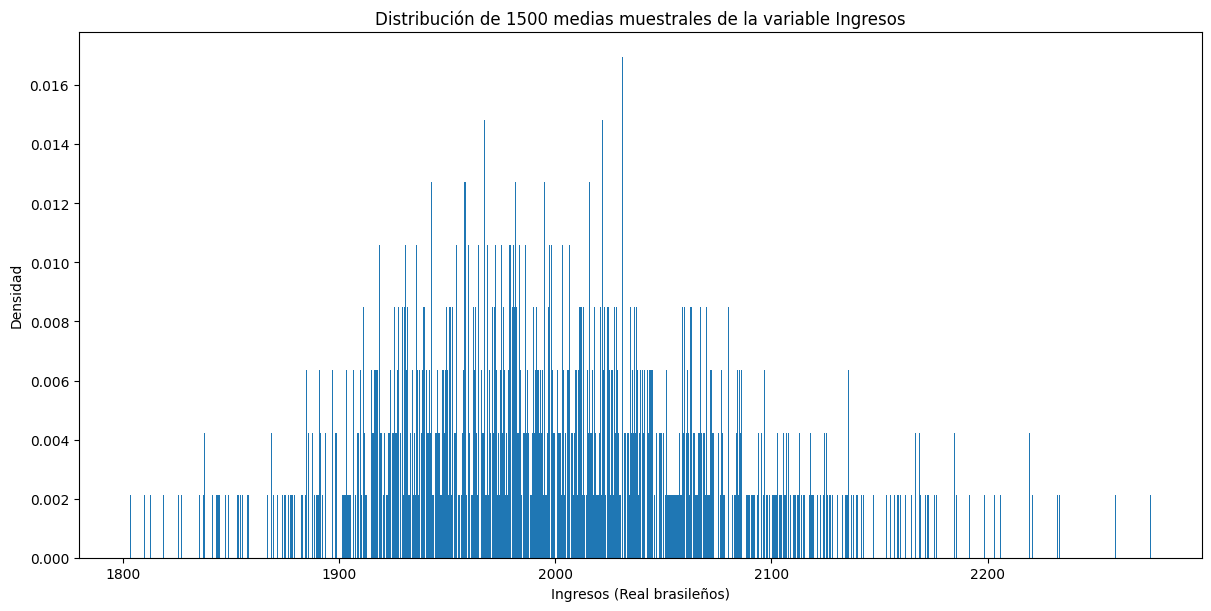

In [82]:
'''
Comprobamos que la distribución de las medias muestrales se aproxima a una
distribución normal.
'''
#Se crea el lienzo y eje asignando ambos a variables.
fig, ax = plt.subplots(figsize=(12,6), layout='constrained')

#Se crea el histograma sobre el eje de Matplotlib.
ax.hist(x=medias_muestrales, bins=1500,density=True, histtype='bar')
#Se personaliza el tamaño y ubicación de los textos con Maplotlib.
ax.set_title('Distribución de 1500 medias muestrales de la variable Ingresos')
ax.set_xlabel('Ingresos (Real brasileños)')
ax.set_ylabel('Densidad')

plt.show()

> El **Teorema Central del Límite** establece que, con el aumento del tamaño de la muestra, la distribución de las medias muestrales se aproxima a una distribución normal con media igual a la media de la población y una desviación estándar igual a la desviación estándar de la variable original dividida por la raíz cuadrada del tamaño de la muestra. Este hecho está asegurado para $n$ mayores o iguales a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [85]:
'''
Comprobamos que la distribución de las medias muestrales tiene una desviación
estándar igual a la desviación estándar poblacional entre la raíz cuadrada del
tamaño de la muestra.
'''
desviacion_ingreso_poblacional = datos.Ingreso.std()
desviacion_ingreso_mmuestrales = medias_muestrales.std()

#Se calcula la desviación de las medias muestrales según la fórmula del teorema.
calculo_desviacion_ingreso_mmuestrales = desviacion_ingreso_poblacional/(tamano_muestra**(1/2))

print(f' La desviación de las medias muestrales es {desviacion_ingreso_mmuestrales:.2f}, mientras que\n',
      f'el cálculo de dividir la desviación poblacional entre la raiz\n',
      f'cuadrada del tamaño de muestra {calculo_desviacion_ingreso_mmuestrales:.2f}')

 La desviación de las medias muestrales es 72.47, mientras que
 el cálculo de dividir la desviación poblacional entre la raiz
 cuadrada del tamaño de muestra 74.31


## <font color=green>4.2 Los niveles de confianza y significación</font>
***

El **nivel de confianza** ($1 - \alpha$) representa la probabilidad de que la estimación sea correcta. Además, el **nivel de significancia** ($\alpha$) expresa la probabilidad de error de la estimación.

El **nivel de confianza** representa el grado de confiabilidad del resultado estimado dentro de un cierto rango. Cuando establecemos un **nivel de confianza del 95%** en una encuesta, por ejemplo, estamos asumiendo que existe una probabilidad del 95% de que los resultados de la encuesta representen bien la realidad, es decir, sean correctos.

El **nivel de confianza** de una estimación se puede obtener del área bajo la curva normal como se muestra en la figura siguiente.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img007.png' width='450px'>


## <font color=green>4.3 Error inferencial</font>
***

El **error inferencial** se define por la **desviación estándar de las medias muestrales** $\sigma_\bar{x}$ y por el **nivel de confianza** determinado para el proceso.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

## <font color=green>4.4 Intervalos de confianza</font>
***

### Intervalo de confianza para la media poblacional

#### Con desviación estándar poblacional conocida

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar de población desconocida

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

## <font color='blue'>Ejemplo: </font>

Suponga que los pesos de las bolsas de arroz de una industria alimentaria se distribuyen aproximadamente como una población normal con **desviación estándar igual a 150 g**. Se seleccionó una **muestra aleatoria de 20 bolsas** de un lote específico, se obtuvo un **peso promedio de 5.050 g**. Construya un intervalo de confianza para el **promedio de la población** asumiendo un **nivel de significancia del 5%**.

### Media muestral

### Nivel de significancia ($\alpha$)

### Nivel de confianza ($1 - \alpha$)

### Obteniendo $z$

### Obteniendo $z$

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img008.png' width='450px'>

### Valores de $z$ para los niveles de confianza más utilizados

|Nivel de<br>confianza|Valor del área bajo<br>la curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0.95                               |1.645|
|95%               |0.975                              |1.96 |
|99%               |0.995                              |2.575|

### Obteniendo $\sigma_\bar{x}$

### Obteniendo $e$

### Solución 1 - Calculando el intervalo de confianza para la media

### Solución 2 - Calculando el intervalo de confianza para la media

# <font color=green>5 CÁLCULO DEL TAMAÑO DE LA MUESTRA</font>
***

## <font color='red'>Problema </font>

Estamos estudiando los ingresos mensuales de los jefes de hogar con ingresos de hasta R$\$$ 5.000,00 en Brasil. Nuestro supervisor determinó que el **error máximo en relación a la media es de R$\$$ 10,00**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **R$\$$ 1.082,79**. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio?

## <font color=green>5.1 Variables cuantitativas y población infinita</font>
***

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Con desviación estándar conocida

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Con desviación estándar desconocida

## $$n = \left(z\frac{s}{e}\right)^2$$

Donde:

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar de la muestra

$e$ = error inferencial

### <font color='red'>Comentarios</font>

1. La desviación estándar ($\sigma$ o $s$) y el error ($e$) deben estar en la misma unidad de medida.

2. Cuando el error ($e$) se representa en términos porcentuales, debe interpretarse como un porcentaje relacionado con el promedio.

## <font color='blue'>Ejemplo: Rendimiento medio</font>

Estamos estudiando los ingresos mensuales de los jefes de hogar. Nuestro supervisor determinó que el **error máximo en relación a la media es de $\$$ 100,00** pesos. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **$\$$ 3.323,39** pesos. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio?

### Obteniendo $\sigma$

### Obteniendo $e$

### Obteniendo $n$

---
---

## <font color='red'>Problema</font>

En un lote de **10 000 latas** de gaseosa, se realizó una muestra aleatoria simple de **100 latas** y se obtuvo que la **desviación estándar muestral del contenido de las latas es igual a 12 ml**. El fabricante estipula un **error máximo en la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95%**, ¿qué tamaño de muestra se debe seleccionar para este estudio?

## <font color=green>5.2 Variables cuantitativas y población finita</font>
***

#### Con desviación estándar conocida

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Con desviación estándar desconocida

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Donde:

$N$ = tamaño de la población

$z$ = variable normal estandarizada

$\sigma$ = desviación estándar poblacional

$s$ = desviación estándar muestral

$e$ = error inferencial

## <font color='blue'>Ejemplo: Industria de refrescos</font>

En un lote de **10 000 latas** de gaseosa, se realizó una muestra aleatoria simple de **100 latas** y se obtuvo que la **desviación estándar muestral del contenido de las latas es igual a 12 ml**. El fabricante estipula un **error máximo en la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95%**, ¿qué tamaño de muestra se debe seleccionar para este estudio?

### Obteniendo $N$

### Obteniendo $z$

### Obteniendo $s$

### Obteniendo $e$

### Obteniendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

# <font color=green>6 FIJANDO EL CONTENIDO</font>
***

## <font color='blue'>Ejemplo: Rendimiento medio</font>

Estamos estudiando **los ingresos mensuales de los jefes de hogar con ingresos de hasta R$\$$ 5.000,00 en Brasil**. Nuestro supervisor determinó que el **error máximo en relación a la media es de R$\$$ 10,00**. Sabemos que la **desviación estándar poblacional** de este grupo de trabajadores es **R$\$$ 1.082,79** y que la **media poblacional** es **R$\$$ 1.426,54**. Para un **nivel de confianza del 95%**, ¿cuál debería ser el tamaño de la muestra de nuestro estudio? ¿Cuál es el intervalo de confianza para la media considerando el tamaño de muestra obtenido?

### Construyendo el conjunto de datos según lo especificado por el problema

### Calcular el tamaño de la muestra

### Calcular el intervalo de confianza para la media

### Realización de una prueba gráfica